In [1]:
%matplotlib inline

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Normalization

# Intro to NN - Not MNIST

In [10]:
DESKTOP = Path().home() / 'Desktop'
not_mnist_dir = DESKTOP / 'notMNIST_small'

In [68]:
def load_notmnist(n_images=100):
    labels = []
    attributes = []
    for folder in not_mnist_dir.iterdir():
        image_files = list(folder.iterdir())[:n_images]
        images = [plt.imread(image) for image in image_files]
        attributes.extend(images)
        labels.extend(folder.name * n_images)
        
    
    return np.array(attributes), np.array(labels)

In [69]:
attributes, labels = load_notmnist(n_images=100)

In [70]:
attributes.shape, labels.shape

((1000, 28, 28), (1000,))

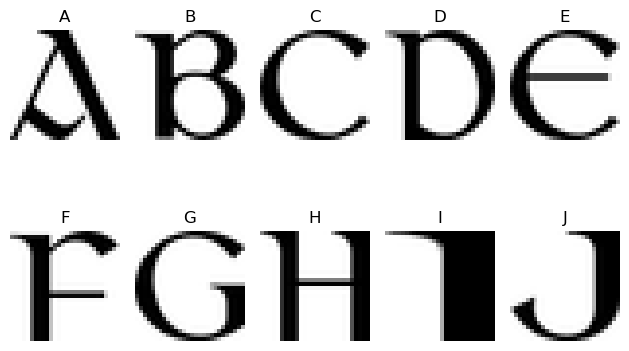

In [89]:
fig, axs = plt.subplots(2, 5)
for i, ax in zip(np.arange(50, 1000, 100), axs.flatten()):
    ax.imshow(attributes[i], cmap=plt.cm.gray_r)
    ax.set_title(labels[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [147]:
labels_numeric = np.array([ord(l) - ord('A') for l in labels])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(attributes, labels_numeric, test_size=100, stratify=labels)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 28, 28), (100, 28, 28), (900,), (100,))

In [149]:
# pd.value_counts(y_train, normalize=True), pd.value_counts(y_train, normalize=True)

In [150]:
INPUT_SHAPE = X_train[0].shape
OUTPUT_SHAPE = len(np.unique(y_train))
INPUT_SHAPE, OUTPUT_SHAPE

((28, 28), 10)

In [151]:
nn = Sequential([
    Input(INPUT_SHAPE),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax),
], name='nn_baseline')

In [152]:
nn.summary()

Model: "nn_baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 16)                12560     
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [168]:
nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    # metrics=None,
    # loss_weights=None,
    # weighted_metrics=None,
    # run_eagerly=None,
    # steps_per_execution=None,
    # jit_compile=None,
)

In [169]:
X_train.shape, y_train.shape

((900, 28, 28), (900,))

In [171]:
nn.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=120,
    # verbose='auto',
    # callbacks=None,
    # validation_split=0.0,
    # validation_data=None,
    # shuffle=True,
    # class_weight=None,
    # sample_weight=None,
    # initial_epoch=0,
    # steps_per_epoch=None,
    # validation_steps=None,
    # validation_batch_size=None,
    # validation_freq=1,
    # max_queue_size=10,
    # workers=1,
    # use_multiprocessing=False,
)

Epoch 1/120
29/29 [==============================] - 0s 3ms/step - loss: 1.5884
Epoch 2/120
29/29 [==============================] - 0s 4ms/step - loss: 1.0609
Epoch 3/120
29/29 [==============================] - 0s 3ms/step - loss: 0.8272
Epoch 4/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6629
Epoch 5/120
29/29 [==============================] - 0s 4ms/step - loss: 0.5877
Epoch 6/120
29/29 [==============================] - 0s 3ms/step - loss: 0.5228
Epoch 7/120
29/29 [==============================] - 0s 4ms/step - loss: 0.5017
Epoch 8/120
29/29 [==============================] - 0s 3ms/step - loss: 0.4536
Epoch 9/120
29/29 [==============================] - 0s 3ms/step - loss: 0.4222
Epoch 10/120
29/29 [==============================] - 0s 2ms/step - loss: 0.4011
Epoch 11/120
29/29 [==============================] - 0s 2ms/step - loss: 0.3711
Epoch 12/120
29/29 [==============================] - 0s 3ms/step - loss: 0.3418
Epoch 13/120
29/29 [=================

In [196]:
predictions = nn.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [197]:
predicted = predictions.argmax(axis=1)
results = pd.DataFrame({
    'observed': y_test,
    'predicted': predicted,
})

In [198]:
results

,observed,predicted
0,4,4
1,2,2
2,8,6
3,5,5
4,5,5
...,...,...
95,4,4
96,7,7
97,6,6
98,6,6


In [203]:
incorrect = results[results['observed'] != results['predicted']]
incorrect

,observed,predicted
2,8,6
19,1,9
20,4,5
35,4,2
36,6,2
42,0,8
49,7,0
52,9,8
58,1,9
80,3,2


In [229]:
np.unique(labels)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U1')

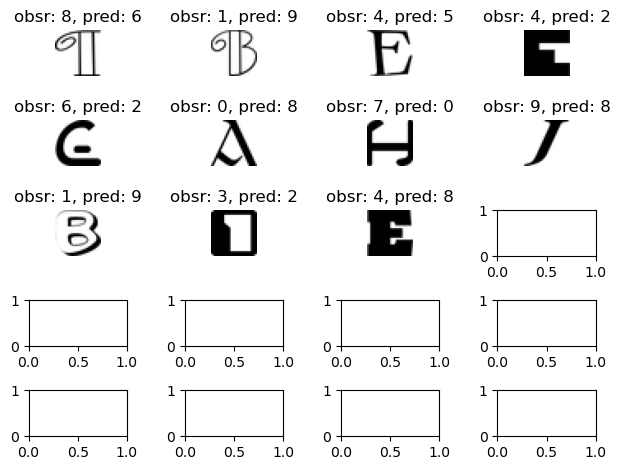

In [230]:
fig, axs = plt.subplots(5,4)

for i, ax in zip(incorrect.index, axs.flatten()):
    ax.imshow(X_test[i], cmap='gray_r')
    ax.axis('off')
    ax.set_title('obsr: {}, pred: {}'.format(*incorrect.loc[i]))

plt.tight_layout()
plt.show()